# Comparison between true labels and shuffled labels accuracy (subject wise and mean) for decision and response.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt

In [2]:
'''cell only for reading time labels'''
from toolbox.methods import read_data
all_epochs, all_rawdata = read_data(amount_of_subjects=1,task='main',resample=True,resample_frequency=50)
time_labels = all_epochs[0].times
print(time_labels.shape)

Frequency before: 500.0
Frequency after: 50.0
(288,)


In [3]:
'''Variables'''
sigma = 2 # for gaussian filter. Sigma 1 seems to have a lot of peaks still so I increased it to 2
timepoints = time_labels.shape[0]

In [5]:
df_resp = pd.DataFrame(columns=['subject', 'timepoint', 'accuracy'])
data = np.load('results_resp_rf/timepoint_response_weightless_0.npy', allow_pickle=True)
timepoints = len(data[0])
rows = []
for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({'subject': subject, 'timepoint': timepoint, 'accuracy': data[subject][timepoint]})
df_resp = pd.DataFrame(rows)


<Axes: xlabel='timepoint', ylabel='accuracy'>

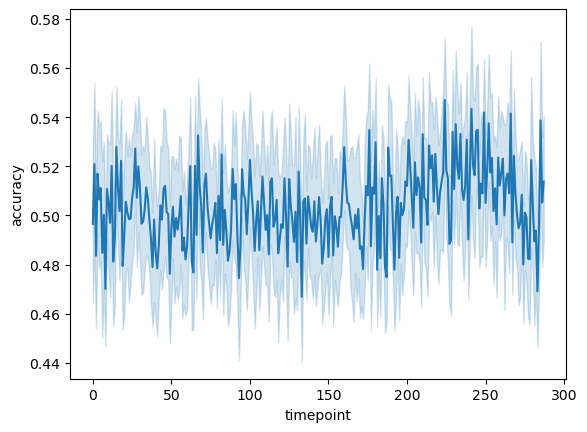

In [6]:
sns.lineplot(x="timepoint", y="accuracy", data=df_resp, 
             # err_style="bars", errorbar=('ci', 95)
             )

In [10]:
df_resp = pd.DataFrame(columns=['subject', 'timepoint', 'time', 'accuracy'])
data = np.load('results_resp_svc/timepoint_response_0.npy', allow_pickle=True)
timepoints = len(data[0])
rows = []
for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({
            'subject': subject, 
            'timepoint': timepoint, 
            'time': time_labels[timepoint],
            'accuracy': data[subject][timepoint], 
            'shuffled': 'No'
            })


mean_data = np.zeros((26, timepoints))
for experiment in range(10):
    data = np.load('results_resp_svc/timepoint_response_shuffled_{}.npy'.format(experiment), allow_pickle=True)
    for subject in range(26):
        mean_data[subject] += data[subject]
mean_data /= 10

for subject in range(26):
    for timepoint in range(timepoints):
        rows.append({
            'subject': subject, 
            'timepoint': timepoint,
            'time': time_labels[timepoint], 
            'accuracy': mean_data[subject][timepoint], 
            'shuffled': 'Yes'
            })
df_resp = pd.DataFrame(rows)
grouped = df_resp.groupby('subject')
df_resp['accuracy_filtered'] = grouped['accuracy'].transform(lambda x: gaussian_filter(x, sigma=sigma))

In [11]:
df_resp

,subject,timepoint,time,accuracy,shuffled,accuracy_filtered
0,0,0,-0.50,0.520000,No,0.520000
1,0,1,-0.48,0.520000,No,0.520000
2,0,2,-0.46,0.520000,No,0.520000
3,0,3,-0.44,0.520000,No,0.520000
4,0,4,-0.42,0.520000,No,0.520000
...,...,...,...,...,...,...
14971,25,283,5.16,0.551923,Yes,0.551923
14972,25,284,5.18,0.551923,Yes,0.551923
14973,25,285,5.20,0.551923,Yes,0.551923
14974,25,286,5.22,0.551923,Yes,0.551923


Text(0.5, 0, 'time (s)')

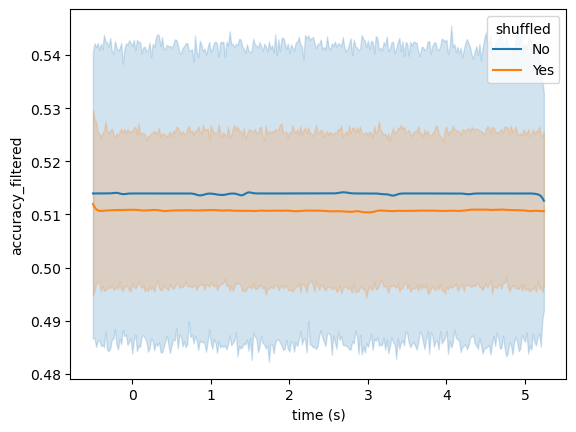

In [12]:
sns.lineplot(x="time", y="accuracy_filtered", data=df_resp, hue='shuffled')
plt.xlabel('time (s)')